**ADDING HIDDEN LAYER TO THE AUTOENCODER AND VISUALIZING THE DATA**

Epoch 1/25
235/235 [==============================] - 4s 15ms/step - loss: 1.1138 - val_loss: 0.9577
Epoch 2/25
235/235 [==============================] - 3s 13ms/step - loss: 0.9140 - val_loss: 0.8558
Epoch 3/25
235/235 [==============================] - 3s 12ms/step - loss: 0.7981 - val_loss: 0.7760
Epoch 4/25
235/235 [==============================] - 3s 12ms/step - loss: 0.7358 - val_loss: 0.7051
Epoch 5/25
235/235 [==============================] - 3s 13ms/step - loss: 0.6788 - val_loss: 0.6419
Epoch 6/25
235/235 [==============================] - 4s 15ms/step - loss: 0.6280 - val_loss: 0.6339
Epoch 7/25
235/235 [==============================] - 3s 12ms/step - loss: 0.6185 - val_loss: 0.6119
Epoch 8/25
235/235 [==============================] - 3s 12ms/step - loss: 0.6079 - val_loss: 0.6084
Epoch 9/25
235/235 [==============================] - 3s 12ms/step - loss: 0.6039 - val_loss: 0.5889
Epoch 10/25
235/235 [==============================] - 4s 16ms/step - loss: 0.5776 - val_lo

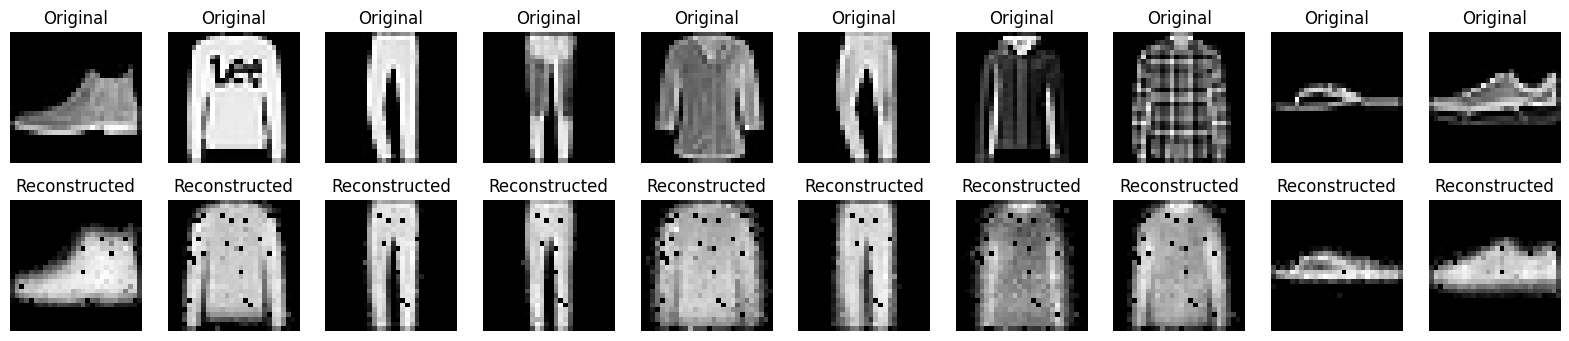

In [5]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
# Define the size of encoded representations and the additional hidden layer size
encoding_dim = 32
hidden_dim = 64
# Input placeholder
input_img = Input(shape=(784,))
# First Encoding Layer
encoded1 = Dense(hidden_dim, activation='relu')(input_img)
# Second Encoding Layer
encoded2 = Dense(encoding_dim, activation='relu')(encoded1)
# First Decoding layer
decoded1 = Dense(hidden_dim, activation='relu')(encoded2)
# Second Decoding layer
decoded = Dense(784, activation='relu')(decoded1)
# Creating the autoencoder model
autoencoder = Model(input_img, decoded)
# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Loading and preprocessing the data
from keras.datasets import fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=25, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
# Predict and visualize one of the reconstructed test data
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28),cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()





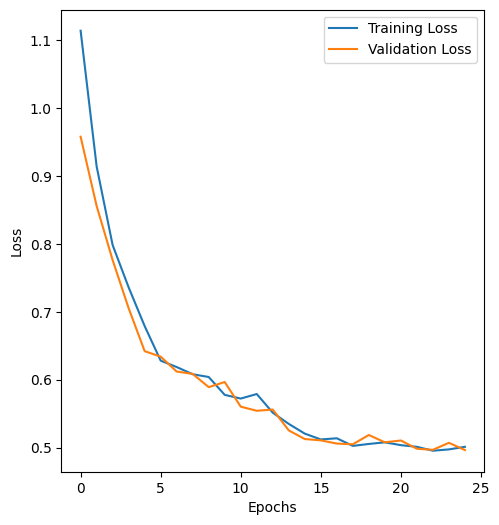

In [6]:
# Visualize the loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

**ADDING HIDDEN LAYER TO THE DENOISING AUTOENCODER AND VISUALIZING THE DATA**

Epoch 1/20
235/235 [==============================] - 4s 13ms/step - loss: 0.3880 - val_loss: 0.3254
Epoch 2/20
235/235 [==============================] - 3s 12ms/step - loss: 0.3143 - val_loss: 0.3099
Epoch 3/20
235/235 [==============================] - 5s 20ms/step - loss: 0.3046 - val_loss: 0.3030
Epoch 4/20
235/235 [==============================] - 4s 15ms/step - loss: 0.3001 - val_loss: 0.2993
Epoch 5/20
235/235 [==============================] - 4s 16ms/step - loss: 0.2970 - val_loss: 0.2957
Epoch 6/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2947 - val_loss: 0.2937
Epoch 7/20
235/235 [==============================] - 4s 17ms/step - loss: 0.2928 - val_loss: 0.2917
Epoch 8/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2913 - val_loss: 0.2909
Epoch 9/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2901 - val_loss: 0.2892
Epoch 10/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2890 - val_lo

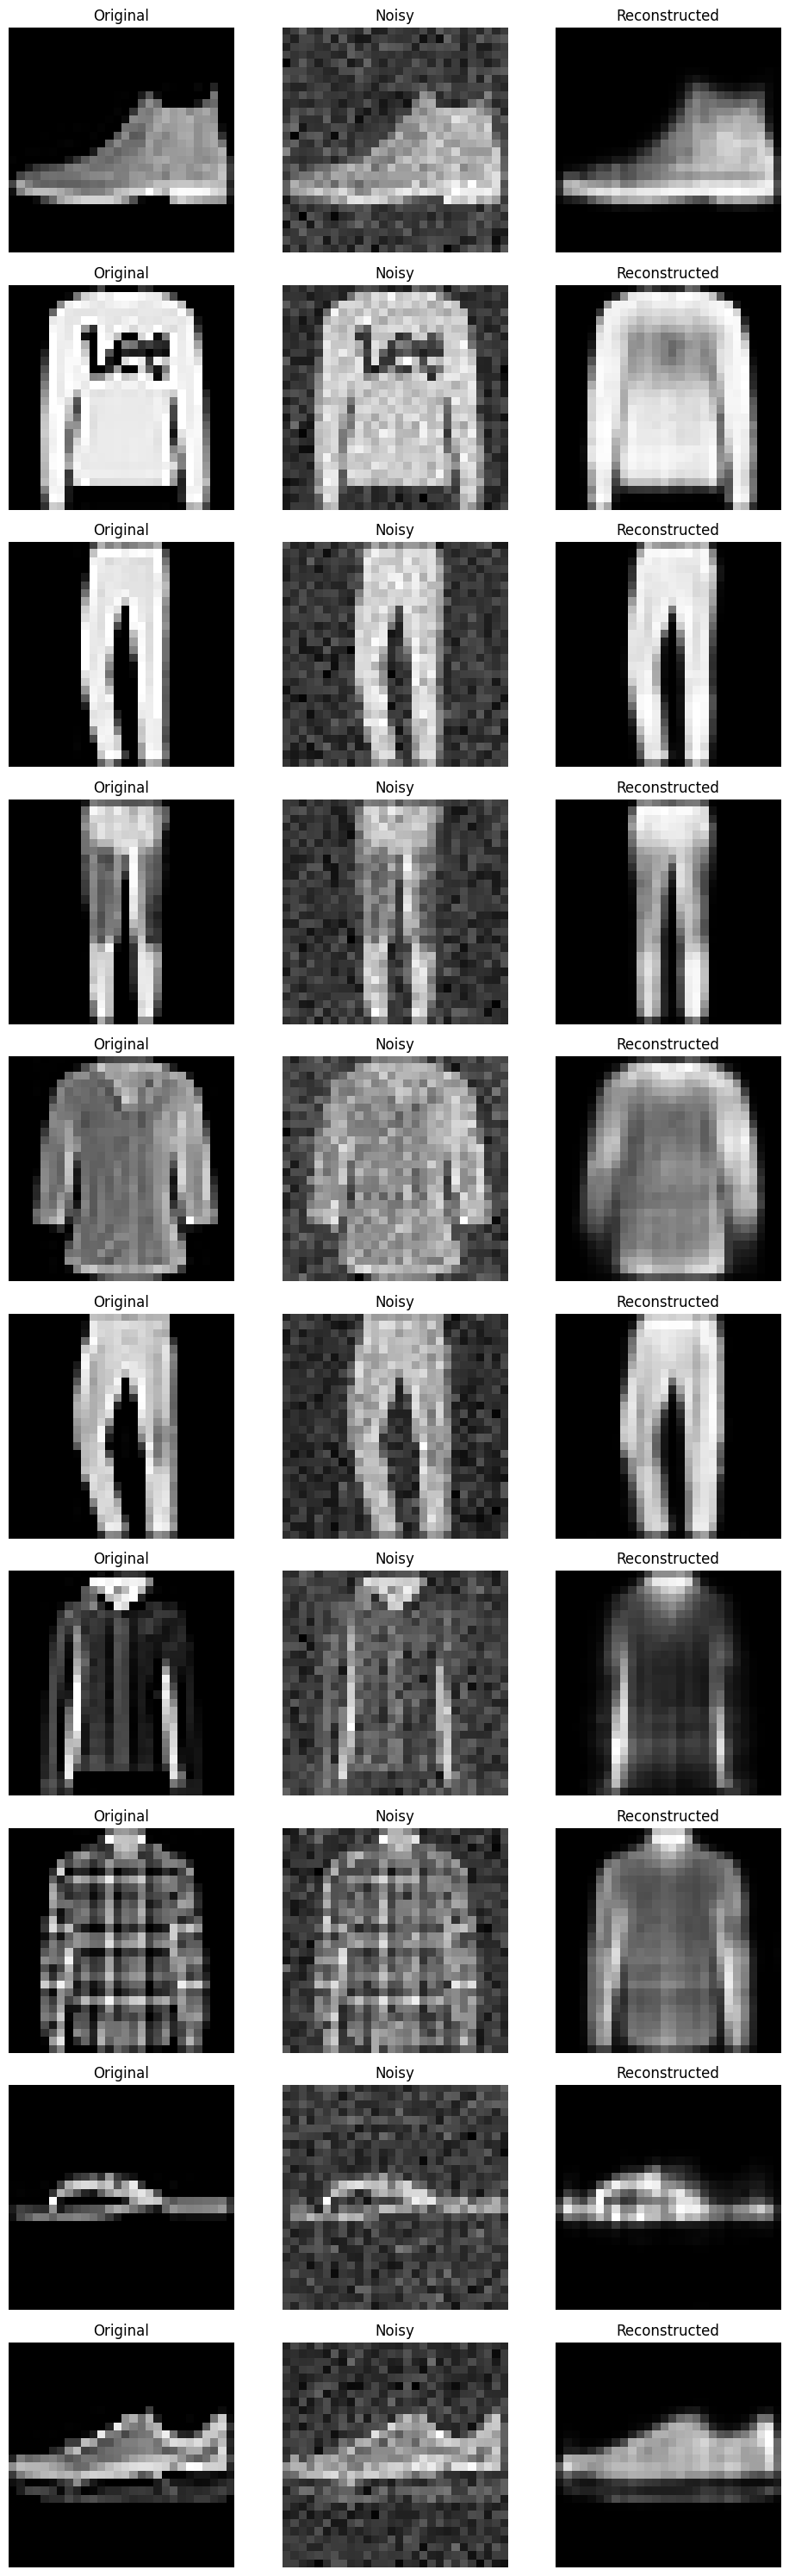

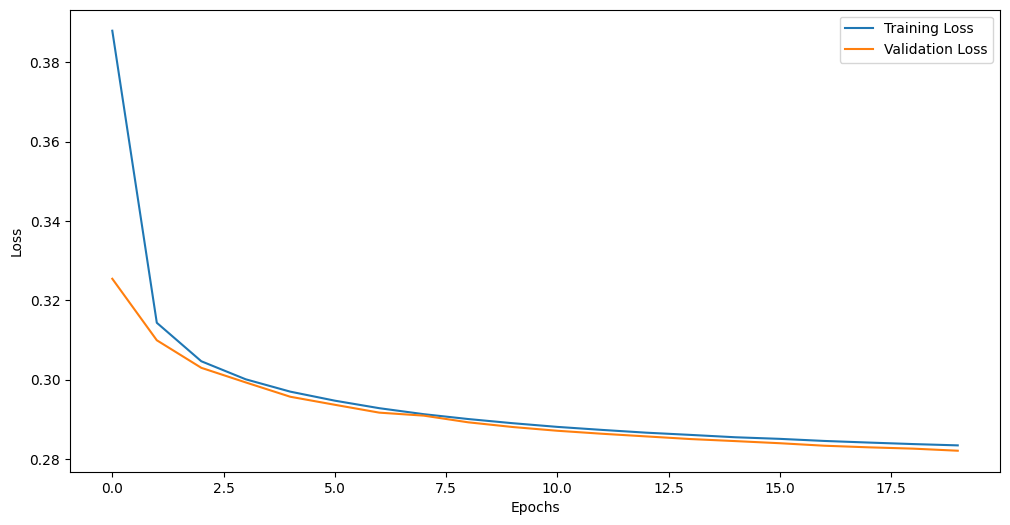

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Define the size of encoded representations and the additional hidden layer size
encoding_dim = 32
hidden_dim = 64  # Increased hidden layer size for better representation

# Input placeholder for noisy data
input_img = Input(shape=(784,))

# First encoding layer
encoded1 = Dense(hidden_dim, activation='relu')(input_img)

# Second encoding layer
encoded2 = Dense(encoding_dim, activation='relu')(encoded1)

# First decoding layer
decoded1 = Dense(hidden_dim, activation='relu')(encoded2)

# Second decoding layer
decoded = Dense(784, activation='sigmoid')(decoded1)

# Create the denoising autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the denoising autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Load and preprocess the data
from keras.datasets import fashion_mnist
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introduce noise
noise_factor = 0.1  # Reduced noise factor
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Train the denoising autoencoder
history = autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test_noisy))

# Predict and visualize one of the reconstructed test data
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display original, noisy, and reconstructed images vertically
num_display = 10  # Number of digits to display
plt.figure(figsize=(10, 30))
for i in range(num_display):
    # Original images
    ax = plt.subplot(num_display, 3, i*3 + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Noisy images
    ax = plt.subplot(num_display, 3, i*3 + 2)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title('Noisy')
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(num_display, 3, i*3 + 3)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Visualize the loss and accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



